https://www.youtube.com/watch?v=iRCaMnR_bpA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



ModuleNotFoundError: No module named 'numpy'

In [347]:
# read the datadf 
df = pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [348]:
df.shape

(892, 6)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [350]:
df.describe()


,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [351]:
#creating a backup copy
backup = df.copy()


Quality

    names are pretty inconsistent
    names have company names attached to it
    some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
    company: many of the names are not of any company like 'Used', 'URJENT', and so on.
    year has many non-year values
    year is in object. Change to integer
    Price has Ask for Price
    Price has commas in its prices and is in object
    kms_driven has object values with kms at last.
    It has nan values and two rows have 'Petrol' in them
    fuel_type has nan values



## cleaning data


#### year has many non-year values

In [352]:
df['year'].value_counts()

year
2015    117
2014     94
2013     94
2016     76
2012     75
       ... 
ture      1
emi       1
able      1
no.       1
zest      1
Name: count, Length: 61, dtype: int64

In [353]:
df = df[df['year'].str.isnumeric()]

In [354]:
df.shape

(842, 6)


year is in object. Change to integer


In [355]:
df['year'].dtype

dtype('O')

In [356]:
df['year'].astype(int)

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [357]:
df['Price'].value_counts()

Price
Ask For Price    23
2,50,000         16
3,50,000         12
4,00,000         11
1,80,000         11
                 ..
7,49,999          1
11,30,000         1
10,74,999         1
3,24,999          1
5,00,001          1
Name: count, Length: 273, dtype: int64

price has Ask for price as value

In [358]:
df = df[df['Price'] != 'Ask For Price']


Price has commas in its prices and is in object


In [359]:
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [360]:
df['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [361]:
df['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object


kms_driven has comma in them


In [362]:
df['kms_driven']  = df['kms_driven'].str.split(expand=True)[0].str.replace(',','')


It has nan values and two rows have 'Petrol' in them


In [363]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [364]:
df =df[df['kms_driven'].str.isnumeric()]

In [365]:
df['kms_driven']=df['kms_driven'].astype(int)

In [366]:
df.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64


fuel_type has nan values


In [367]:
df=df[~df['fuel_type'].isna()]

In [368]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [369]:
df.shape

(816, 6)


name and company had spammed data...but with the previous cleaning, those rows got removed.



Company does not need any cleaning now. Changing car names. Keeping only the first three words


In [370]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [371]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [372]:
df=df.reset_index(drop=True)

In [373]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel



Cleaned Data


In [374]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [375]:
df.to_csv('Cleaned_data.csv')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 32.0+ KB


In [377]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816,8.160000e+02,816.000000,816
unique,254,25,21,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,2015,NaN,NaN,Petrol
freq,51,221,111,NaN,NaN,428
mean,NaN,NaN,NaN,4.117176e+05,46275.531863,NaN
std,NaN,NaN,NaN,4.751844e+05,34297.428044,NaN
min,NaN,NaN,NaN,3.000000e+04,0.000000,NaN
25%,NaN,NaN,NaN,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,NaN,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,NaN,4.912500e+05,56818.500000,NaN


In [378]:
df[df['Price'] > 6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [379]:
df =  df[df['Price'] < 6e6]

In [380]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel



Checking relationship of Company with Price


In [381]:

df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13636\475026656.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


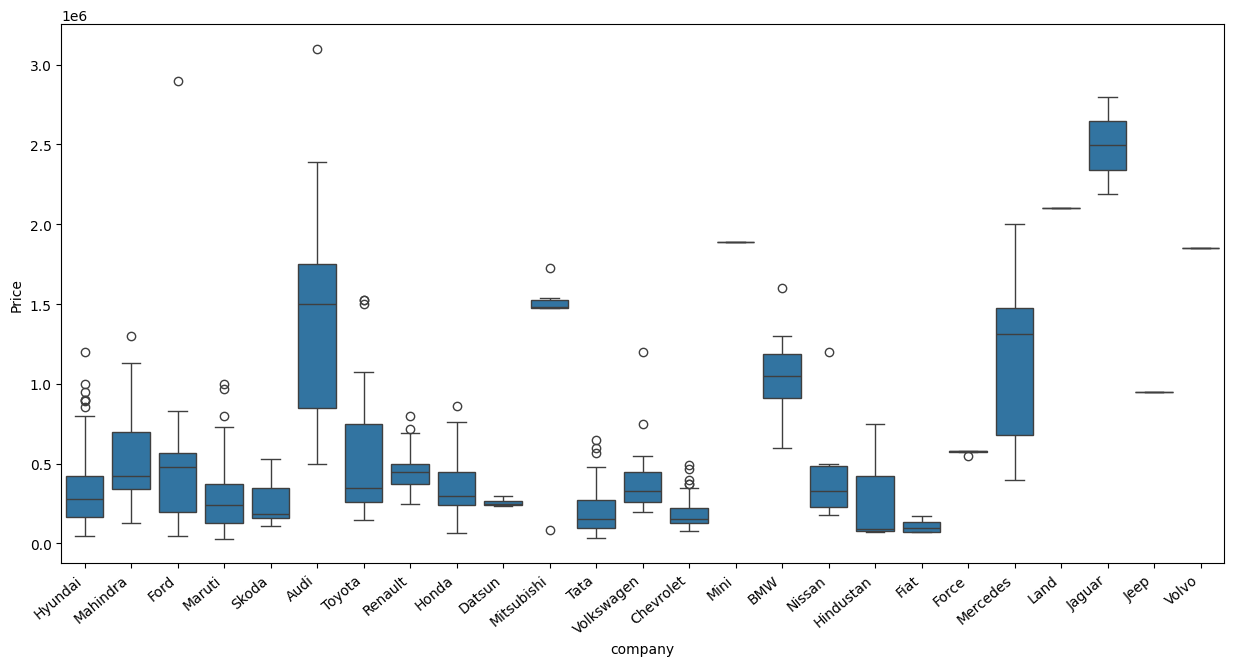

In [382]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

c:\Users\LENOVO\Desktop\Pyspark\pyspark-1\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\Desktop\Pyspark\pyspark-1\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\Desktop\Pyspark\pyspark-1\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\Desktop\Pyspark\pyspark-1\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\Desktop\Pyspark\pyspar

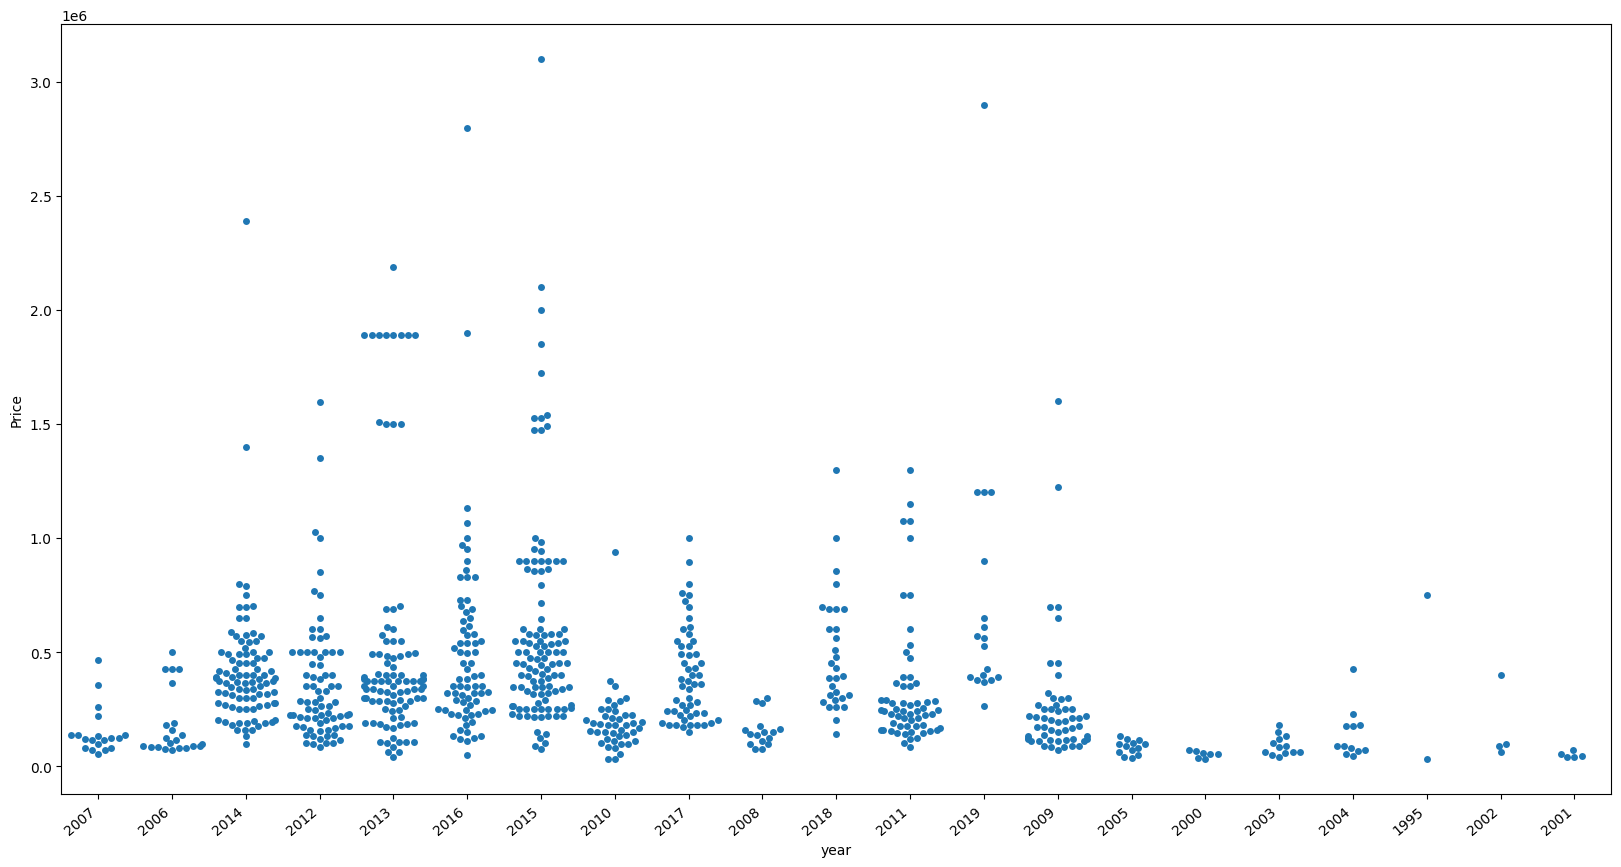

In [383]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

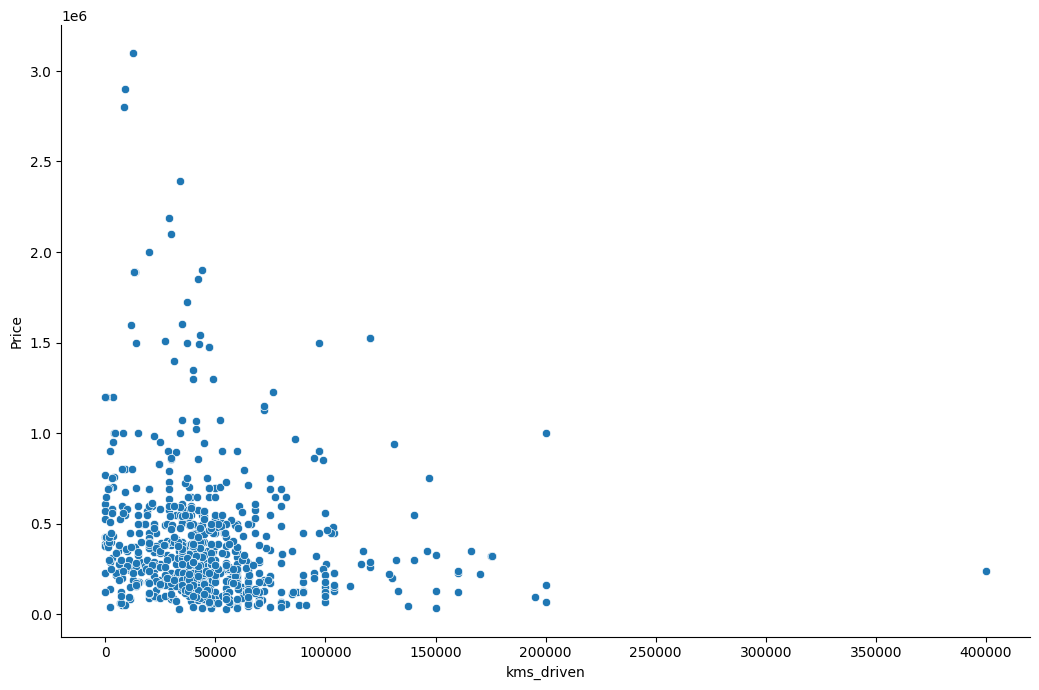

In [384]:
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

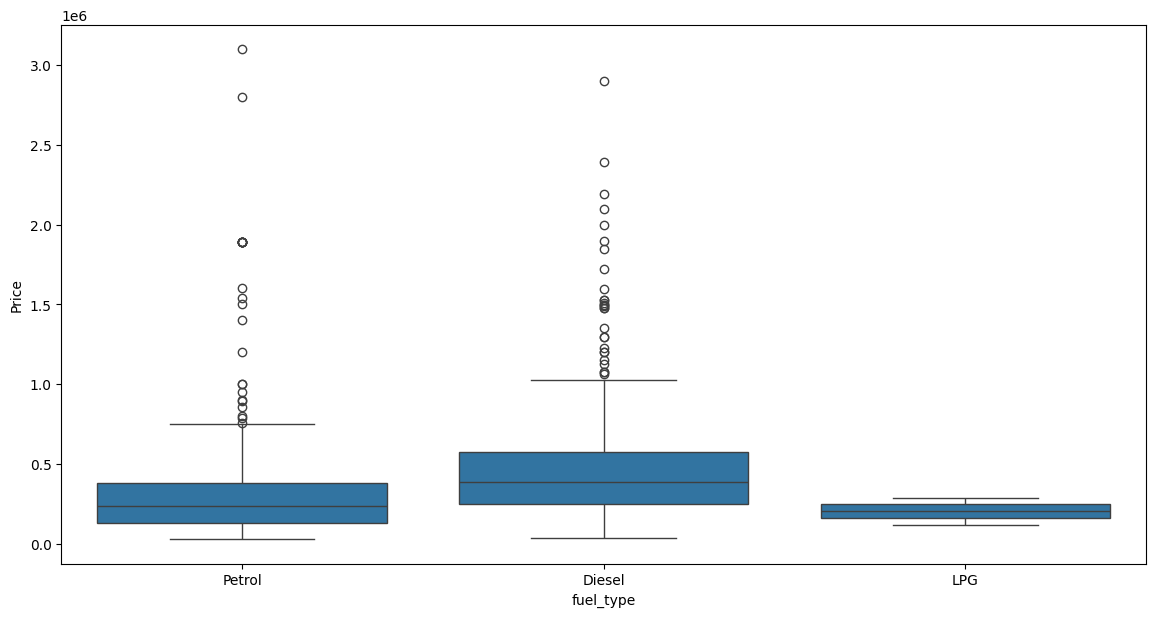

In [385]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)


Relationship of Price with FuelType, Year and Company mixed


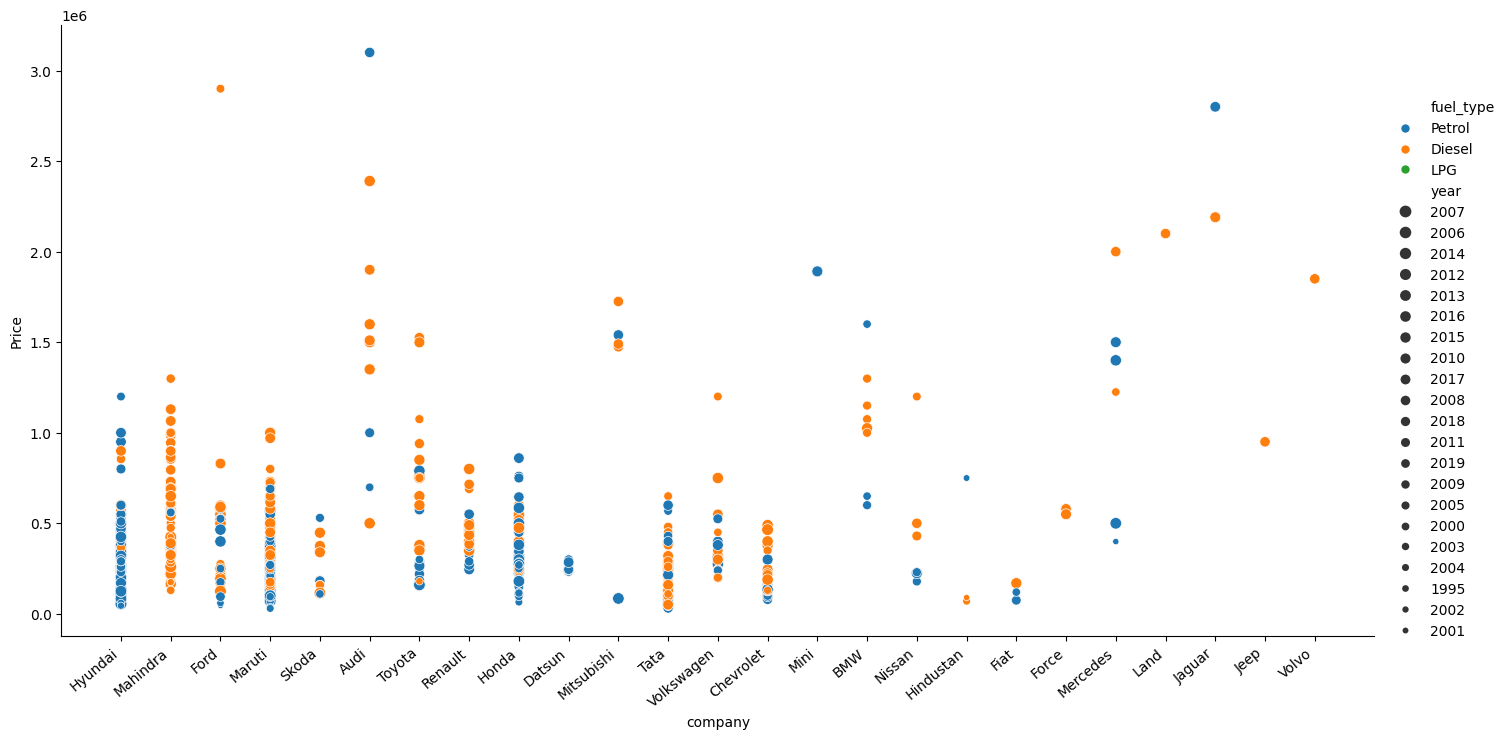

In [386]:
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## Model

In [387]:
X = df.drop(columns='Price')
y = df['Price']

In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_tes = train_test_split(X,y,test_size=0.2)

In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [390]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [391]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [392]:
column = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name','company','fuel_type']),
                                 remainder='passthrough')

In [393]:
lr = LinearRegression()

In [394]:
pipe = make_pipeline(
    column,
    lr
)

In [395]:
pipe.fit(X_train,y_train)

c:\Users\LENOVO\Desktop\Pyspark\pyspark-1\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [396]:
y_pred = pipe.predict(X_test)
y_pred

array([ 216763.83813401,  290478.51339664, 1409239.56039526,
        152849.90319921,  227309.23733769,  402388.13087967,
        501768.41884555, 1413548.32453728,  269366.52776582,
        152714.55980435,  218327.26044601,  282599.14827827,
        325888.89414133,  716474.41629016,  179836.80964777,
        508295.5413703 ,  328095.14392217,  119765.90574492,
        289989.97376879,  335736.43084857,  379491.62804554,
        339955.42189237,  363694.53584001,  652396.21255788,
        689927.93771061,  351644.26555502,  276619.00441727,
        326299.06571495,   72475.47518504,  271460.42180325,
        333344.58257115,  413843.30468796,  252560.17131649,
        405862.05875956,  400262.57088317,  743079.66788447,
        338214.30073531,  313556.11663284,  473905.50243842,
        347374.81549611,  563965.90333585,  435320.29807155,
        416086.78271134,  523567.00039293,  218327.26044601,
        256624.64040283,  261489.81224069,  115606.77369127,
        171953.30957937,

In [397]:
r2_score(y_tes, y_pred)

0.7222251985523354

In [398]:
scores = []
for i in range(500):
    X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [399]:
scores

[0.6589775490516477,
 0.47859534625114053,
 0.6206184325887315,
 0.5370851059720391,
 0.8189003209843422,
 0.6634592678218548,
 0.627651080774843,
 0.6298500612485975,
 0.6721337147755825,
 0.569999290976279,
 0.648410356051369,
 0.6085830042105451,
 0.4570387283628752,
 0.6674701982444136,
 0.5667086409016293,
 0.710110955902248,
 0.48789129723115376,
 0.6657624958397428,
 0.6089284148932655,
 0.6397685755956675,
 0.6410709224098974,
 0.6210283939684125,
 0.7366931810218385,
 0.6403435054918312,
 0.5492294440786976,
 0.49865430736412675,
 0.6732835680238167,
 0.7035631613026931,
 0.7254576384148604,
 0.6010349558544669,
 0.6245053608697559,
 0.6290270877645332,
 0.7651654313017575,
 0.7853874888796626,
 0.5622385517206983,
 0.685024845194027,
 0.5779619998835577,
 0.6170146213581826,
 0.5393853480656206,
 0.7164312140567131,
 0.32666867715670367,
 0.6733782138107586,
 0.5731311949541246,
 0.6659932444752472,
 0.6604128224175608,
 0.6975409772585117,
 0.5258705780715188,
 0.58820642905

In [400]:
np.argmax(scores)

433

In [401]:
scores[np.argmax(scores)]

0.8457059012561223

In [402]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8457059012561223

In [403]:
import pickle

In [404]:
pickle.dump(pipe, open('LinearRegressionModel.pkl','wb'))

In [405]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [406]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], columns=['name','company','year','kms_driven','fuel_type']))

array([458894.10960853])

In [418]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese